<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020)</h2>
<h2 align="center">Lab 5: Decision Trees </h2>
<h3 align="center">Eng. Ahmed Wael</h3>

## Import the needed libraries

In [1]:
import numpy as np
from collections import Counter
from scipy import stats
from math import log2, sqrt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
import six

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.model_selection import GridSearchCV

# Exploring the dataset

## We are going to use a very famous dataset called [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/adult)


The objective of this dataset is to predict whether income exceeds 50,000 dollars per year based on census data. 
So, we will use the decision tree algorithm to predict if an individual earns more than $50K annually and is therefore eligible for the new credit card.


### Dataset attributes 

1. age : continuous variable
2. state_sample	: continuous variable
3. education_num : continuous variable
4. capital_gain : continuous variable
5. capital_loss : continuous variable
6. hours_per_week : continuous variable
7. workclass : categorical variable
8. education : categorical variable
9. marital_status : categorical variable
10. occupation : categorical variable
11. relationship	: categorical variable
12. c1	: categorical variable
13. c2	: categorical variable
14. c3 : categorical variable

### Load the dataset

In [ ]:
data = pd.read_csv("adult_data.csv")
data.head()

,age,workclass,state_sample,education,education_num,marital_status,occupation,relationship,c1,c2,capital_gain,capital_loss,hours_per_week,c3,eligible
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,c14,c21,2174,0,40,c337,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,c14,c21,0,0,13,c337,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,c14,c21,0,0,40,c337,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,c12,c21,0,0,40,c337,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,c12,c20,0,0,40,c34,0


### Describe the dataset

In [ ]:
data.describe()

,age,state_sample,education_num,capital_gain,capital_loss,hours_per_week,eligible
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
print(f'dataset shape is {data.shape}')

dataset shape is (30162, 15)


### Which ones are categorical and which are numerical?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   state_sample    30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   c1              30162 non-null  object
 9   c2              30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  c3              30162 non-null  object
 14  eligible        30162 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.5+ MB


## Data Exploration

<AxesSubplot:xlabel='eligible', ylabel='count'>

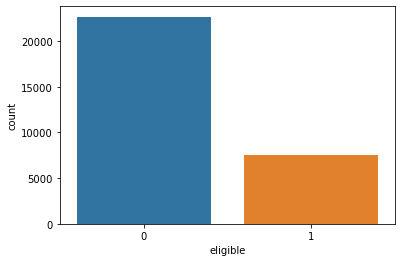

In [ ]:
## Is the dataset balanced?

sns.countplot(x='eligible',data=data)

In [ ]:

categorical = ['workclass', 'education', 'marital_status', 'occupation', 
                   'relationship', 'c1', 'c2', 'c3']
numerical = ['age', 'education_num','capital_gain', 'capital_loss',
                'hours_per_week']
 
X = pd.concat([data[categorical], data[numerical]], axis=1) ## Just sort them, no need for encoding
y = data['eligible']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)


# What is Entropy ?

<img src="https://i.ibb.co/x88jGKC/Entropy-Versus-Probability.png">
<br/> 
<br/> 
source: http://matlabdatamining.blogspot.com/2006/11/introduction-to-entropy.html

$$Entropy\ H(\pi) = -\sum \pi log_2(\pi)$$

## Entropy Implementation 

In [ ]:
def entropy(class_y):
    """ 
    Input: 
        - class_y: list of class labels (0's and 1's)
    
    Output: 
        - The entropy
        
    Compute the entropy for a list of classes
    """
    
    if len(class_y) <=1: ## Handling if there is only 1 or 0 labels    (labels are the possible values for the Random Variable) 
        return 0
    
    total_count = np.bincount(class_y) # count (now total_count[0] has the count of 0's and total_count[1] has the count of 1's)
    probabilities = total_count[np.nonzero(total_count)] / len(class_y) # Find the probabilities
    if len(probabilities) <= 1 : ## Handling if the length of the probabilities is less than or equal to 1   (will this ever happen?!!)
        return 0

    return - np.sum(probabilities * np.log(probabilities)) / np.log(len(probabilities) ) ## Entropy equation

# Information Gain

$$Conditional\ Entropy\ H(Y|X)= -\sum p(Y=y, X=x )\log\frac{p(Y=y, X=x )}{p(X=x)}$$

$$Information\ Gain\ IG(Y|X)= H(Y) - H(Y|X)$$

In [ ]:
def information_gain(previous_y, current_y):
    """
    Inputs:
        - previous_y : the distribution of original labels (0's and 1's) ---->  [0,0,0,1,1,1]
        - current_y  : the distribution of labels after splitting based on a particular    
                     split attribute and split value   ----->  [[0,0], [1,1,1,0]] for example
    
    Outputs:
        - info_gain : The information gain after partitioning
        
    Compute and return the information gain from partitioning the previous_y labels into the current_y labels.
    
    """ 
    conditional_entropy = 0 ## IG = H(Y) - CE(Y|X)
    for y in current_y:
        conditional_entropy += (entropy(y)*len(y)/len(previous_y))       #???

    info_gain = entropy(previous_y) - conditional_entropy
    return info_gain


### Test the information gain and the entropy implementations

In [ ]:
# TEST CASE
test_class_y = [0,0,0,1,1,1,1,1]
print(entropy(test_class_y))
 
previous_y = [0,0,0,1,1,1]
current_y = [[0,0], [1,1,1,0]]
print(information_gain(previous_y, current_y))

0.954434002924965
0.4591479170272448


# The Decision Tree ID3 algorithm
1. Find best feature
2. Find best split for the best feature
3. Parition classes based on steps 1 and 2

## Step 3 : partition_classes

- One of the basic operations is to split a tree on one attribute - step 1 - with a specific value for that attribute - step 2.


- We need to also take into consideration if the split attribute is either a numerical or categorical.


In [ ]:
def partition_classes(X, y, split_attribute, split_val):
    """
    Inputs:
    - X               : (N,D) list containing all data attributes
    - y               : a list of labels
    - split_attribute : column index of the attribute to split on
    - split_val       : either a numerical or categorical value to divide the split_attribute
    
    Outputs:
    - X_left          : X left after partitioning
    - X_right         : X right after partitioning
    - y_left          : y left after partitioning
    - y_right         : y right after partitioning
    
    Partition the data(X) and labels(y) based on the split value    
    """
    """
    Example:
    
    X = [[3, 'aa', 10],                 y = [1,
         [1, 'bb', 22],                      1,
         [2, 'cc', 28],                      0,
         [5, 'bb', 32],                      0,
         [4, 'cc', 32]]                      1]
    
    Here, columns 0 and 2 represent numeric attributes, while column 1 is a categorical attribute.
    
    Consider the case where we call the function with split_attribute = 0 (the index of attribute) and split_val = 3 (the value of attribute).
    Then we divide X into two lists - X_left, where column 0 is <= 3 and X_right, where column 0 is > 3.
    
    X_left = [[3, 'aa', 10],                 y_left = [1,
              [1, 'bb', 22],                           1,
              [2, 'cc', 28]]                           0]
              
    X_right = [[5, 'bb', 32],                y_right = [0,
               [4, 'cc', 32]]                           1]

    Consider another case where we call the function with split_attribute = 1 and split_val = 'bb'
    Then we divide X into two lists, one where column 1 is 'bb', and the other where it is not 'bb'.
        
    X_left = [[1, 'bb', 22],                 y_left = [1,
              [5, 'bb', 32]]                           0]
              
    X_right = [[3, 'aa', 10],                y_right = [1,
               [2, 'cc', 28],                           0,
               [4, 'cc', 32]]                           1]
               
    """
    
    X = np.array(X)
    column_split = X[:,split_attribute]
    X_left=[]
    y_right = []
    X_right = []
    y_left = []
    
    counter=0 ## Counter for appending

    if isinstance(split_val,str) == False: ## Numerical attribute
        for i in column_split:
            if i <= split_val:
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            counter+=1
            
    else: ## Categorical attribute
        for i in column_split:
            if i == split_val: ## == and NOT <=
                X_left.append(X[counter])
                y_left.append(y[counter])
            else:
                X_right.append(X[counter])
                y_right.append(y[counter])
            counter+=1

    return X_left, X_right, y_left, y_right 

## Step 2 : Find Best Split

- In this step, we find the *order* of features splitting. 


- To do so, we calculate the information gain of each value in the attribute list. 


- Then, we find the optimal split value. This corresponds to the one with the highest information gain


In [ ]:
def find_best_split(X, y, split_attribute):
    
    """
    Inputs:
        - X               : (N,D) list containing all data attributes
        - y               : a list array of labels
        - split_attribute : Column of X on which to split
    
    Outputs:
        - best_split_val  : optimal split value for a given attribute
        - best_info_gain  : the corresponding information gain
    
    Compute and return the optimal split value for a given attribute, along with the corresponding information gain

    """
    
    """
    
      Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           split_val = 1  -->  info_gain = 0.17
           split_val = 2  -->  info_gain = 0.01997
           split_val = 3  -->  info_gain = 0.01997
           split_val = 4  -->  info_gain = 0.32
           split_val = 5  -->  info_gain = 0
        
       best_split_val = 4; info_gain = .32; 
    """
    
    
    best_info_gain = 0 # Initialize the best information gain
    X = np.array(X)
    column_split = X[:,split_attribute]

    column_split = np.unique(column_split) ## Get the unique values only !
    best_split_val = column_split[0] ## Set the best split as the initial one ( in case it is the only one)

    for split_val in column_split:
        current_X_left, current_X_right, current_y_left, current_y_right = partition_classes(X, y, split_attribute, split_val) ## Call the partition classes function
        current_y = []
        current_y.append(current_y_left)
        current_y.append(current_y_right)

        current_info_gain = information_gain(y,current_y) ## Calculate the information gain
        if current_info_gain > best_info_gain: ## check if it is better than before
            best_info_gain = current_info_gain
            best_split_val = split_val

    return best_split_val, best_info_gain

## Step 1 : Find Best Feature

- We use steps 2 and 3 to find the best feature

In [ ]:
def find_best_feature(X, y):
    """
    Inputs:
        - X              : (N,D) list containing all data attributes
        - y              : a list of labels
    
    Outputs:
        - best_feature   : Best Feature to split on
        - best_split_val : Best Split Value for this feature
        
    Compute and return the optimal attribute to split on and optimal splitting value
    """
    
    """
        
    Example:
    
        X = [[3, 'aa', 10],                 y = [1,
             [1, 'bb', 22],                      1,
             [2, 'cc', 28],                      0,
             [5, 'bb', 32],                      0,
             [4, 'cc', 32]]                      1]
    
        split_attribute = 0
        
        Starting entropy: 0.971
        
        Calculate information gain at splits:
           feature 0:  -->  info_gain = 0.32
           feature 1:  -->  info_gain = 0.17
           feature 2:  -->  info_gain = 0.4199
        
       best_split_feature: 2 best_split_val: 22
    """
    
    
    best_info_gain = 0
    best_feature = 0
    best_split_val = 0
    for feature_index in range(len(X[0])): ## Loop over the features , find the best split 
        current_best_split_val, current_best_info_gain =  find_best_split(X, y,  feature_index)
        if current_best_info_gain > best_info_gain:
            best_info_gain = current_best_info_gain
            best_feature = feature_index
            best_split_val = current_best_split_val
    return best_feature, best_split_val

# Decision Tree ID3 Full Algorithm : Putting Everything Together

- We will use a recursive algorithm, so we need to have a base case - a stopping condition for splitting- . It can be one of the following:

    - If all data points in that node have the same label

    - If the current node is at the maximum depth. In this case, you may assign the mode of the labels as the class label


- We are going to use a class, so you might need to revise the OOP part in the first lab.


- We are going to use a dictionary to store the tree information. It will contain the class labels, feature and value to split, and reference to the right and left children.

- For example:
```
 node = {
            'isLeaf': False,
            'split_attribute': 1,
            'split_value': 3,
            'is_categorical': True,
            'leftTree': leftTree,  --> This is a instance of the class itself
            'rightTree': rightTree --> This is a instance of the class itself
        };
```


<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545934190/1_r5ikdb.png">
<br/> 
<br/> 
source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python

In [ ]:
class MyDecisionTree(object):
    def __init__(self, max_depth=None):
        """        
        Args:
        
        max_depth: maximum depth of the tree including the root node.
        """
        self.tree = {}
        self.residual_tree = {} ## For prediction
        self.max_depth = max_depth

        
    def fit(self, X, y, depth):
        """
        Args:
        X     : N*D matrix corresponding to the data points
        Y     : N*1 array corresponding to the labels of the data points
        depth : depth of node of the tree
        
        Output:
        node : A dictionary that contains this node information
        """

        # base cases
        unique_labels = np.unique(y) 
        if (len(unique_labels)==1) or (depth == max_depth): ## IF we reach the maximum depth or the unique labels = 1
            unique_labels, counts_unique_labels = np.unique(y, return_counts=True)
            index = counts_unique_labels.argmax()
            classification = unique_labels[index]    
            return classification      #majority voting?
    
        best_feat, best_split  = find_best_feature(X, y) ## Find best feature (Step 1)
        best_split, information_gain = find_best_split(X, y, best_feat) ## Split on this feature (Step 2)
        X_left, X_right, y_left, y_right = partition_classes(X, y, best_feat, best_split) ## Partition on the best feature and split (Step 3)
        
        if isinstance(best_split,str):
            question = "{} == {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        else:
            question = "{} <= {}".format(best_feat, best_split) ## Represnt the sub-tree as a question and an answer
        node = {question: []}
        
        # find answers (recursion)
        depth+=1 
        yes_answer = self.fit(X_left,y_left, depth)  # RECURSION on the left sub tree
        no_answer = self.fit(X_right, y_right, depth) ## RECURSION on the right sub tree
        
        if yes_answer == no_answer: ## Both trees are the same
            node = yes_answer
        else:
            node[question].append(yes_answer) ## Append the questions to the answers
            node[question].append(no_answer)
        self.tree = node ## The tree is equal to the node
        return node
        
    def predict(self, record,flag=1):
        """
        Args:
        
        record: D*1, a single data point that should be classified
        
        Output:
        prediction: True if the predicted class label is 1, False otherwise      
        
        classify a sample in test data set using self.tree and return the predicted label
        """
        if flag == 1: ## First time
            self.residual_tree = self.tree
        question = list(self.residual_tree.keys())[0]
        feature, comparison, value = question.split() ## Split the question to get the feature and its value

        
        ## Check if str or int
        if comparison == "==": # String
            if record[int(feature)] == value:
                answer = self.residual_tree[question][0]  ## Left sub tree
            else:
                answer = self.residual_tree[question][1] ## Right sub-tree
        elif comparison == "<=": #Integer
            if record[int(feature)] <= float(value):
                answer = self.residual_tree[question][0] ## Right Sub-tree
            else:
                answer = self.residual_tree[question][1] ## Left sub-tree        try: ## Integer
                
        # base case
        if not isinstance(answer, dict):  ## If we have the answer
            return answer
    
        # recursion
        else:
            self.residual_tree = answer ## The residual tree is the answer !
            return self.predict(record,0) ## have flag = 0 so the residual tree is our sub-problem

### Evaluate the ID3 implementation

In [ ]:
def DecisionTreeEvalution(id3,X,y, verbose=False):

    y_predicted = []
    for record in X: 
        y_predicted.append(id3.predict(record))
    # Comparing predicted and true labels
    results = [prediction == truth for prediction, truth in zip(y_predicted, y)]
    # Accuracy
    accuracy = float(results.count(True)) / float(len(results))
    if verbose:
        print("accuracy: %.4f" % accuracy)
    return accuracy

In [ ]:
#### Convert the dataframes to numpy arrays as our implementation works on NumPy arrays
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()
max_depth = 7
inital_depth = 0
id3_dt = MyDecisionTree(max_depth)
# Building a tree
print("fitting the decision tree")
id3_dt.fit(X_train, y_train, inital_depth)

# Evaluating the decision tree
DecisionTreeEvalution(id3_dt,X_test,y_test, True)

fitting the decision tree
accuracy: 0.7956


0.7956240676280457

## What is the final tree

In [ ]:
id3_dt.tree

{'2 ==  Married-civ-spouse': [{'9 <= 12': [{'10 <= 5013': [{'9 <= 8': [{'8 <= 36': [{'3 ==  Tech-support': [{'8 <= 30': [0,
              1]},
            {'7 == c323': [1, 0]}]},
          0]},
        {'8 <= 33': [{'8 <= 24': [0, {'11 <= 1740': [0, 1]}]},
          {'11 <= 1740': [0, {'11 <= 1977': [1, 0]}]}]}]},
      {'8 <= 61': [{'1 ==  Preschool': [0, 1]},
        {'10 <= 10566': [{'10 <= 9386': [{'0 ==  Local-gov': [0, 1]}, 0]},
          1]}]}]},
    {'10 <= 5013': [{'11 <= 1740': [{'12 <= 30': [{'4 ==  Wife': [1, 0]},
          {'3 ==  Exec-managerial': [{'11 <= 0': [1, 0]}, 1]}]},
        {'11 <= 1977': [{'8 <= 28': [{'4 ==  Husband': [1, 0]}, 1]},
          {'11 <= 2051': [0, {'0 ==  Local-gov': [0, 1]}]}]}]},
      {'8 <= 62': [1,
        {'12 <= 45': [1, {'0 ==  Self-emp-not-inc': [0, 1]}]}]}]}]},
  {'10 <= 6849': [{'9 <= 12': [{'8 <= 28': [{'0 ==  Private': [{'12 <= 49': [0,
            {'7 == c330': [1, 0]}]},
          0]},
        {'12 <= 41': [0, {'11 <= 2206': [0, {'

# Compare with Sklearn Decision Tree

Sklearn decision tree implementation can't handle categorical data 


https://github.com/scikit-learn/scikit-learn/issues/5442

https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [ ]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8534725675451682


# Visualize the tree

In [ ]:
feature_names = list(X_train.columns)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_tree.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

# Plot the features importance

1 feature marital_status_ Married-civ-spouse 0.42598171378711264
2 feature education_num 0.20347421738241356
3 feature capital_gain 0.19763928810771172
4 feature age 0.06635900558173644
5 feature capital_loss 0.05179449844577836
6 feature hours_per_week 0.03032587545929722
7 feature occupation_ Exec-managerial 0.006505086074851692
8 feature relationship_ Wife 0.0035377261581412077
9 feature occupation_ Prof-specialty 0.002989181157133509
10 feature workclass_ Private 0.002001788168732481
11 feature occupation_ Transport-moving 0.0014692789344171583
12 feature occupation_ Machine-op-inspct 0.0014266221811375876
13 feature education_ Preschool 0.0011482603771392152
14 feature occupation_ Other-service 0.0008713530897137304
15 feature workclass_ Self-emp-not-inc 0.0007441716952441054
16 feature c3_c330 0.0007343534616974588
17 feature marital_status_ Married-AF-spouse 0.0006246656367571916
18 feature c3_c336 0.000549269849029299
19 feature workclass_ Local-gov 0.0005483642526015628
20 fea

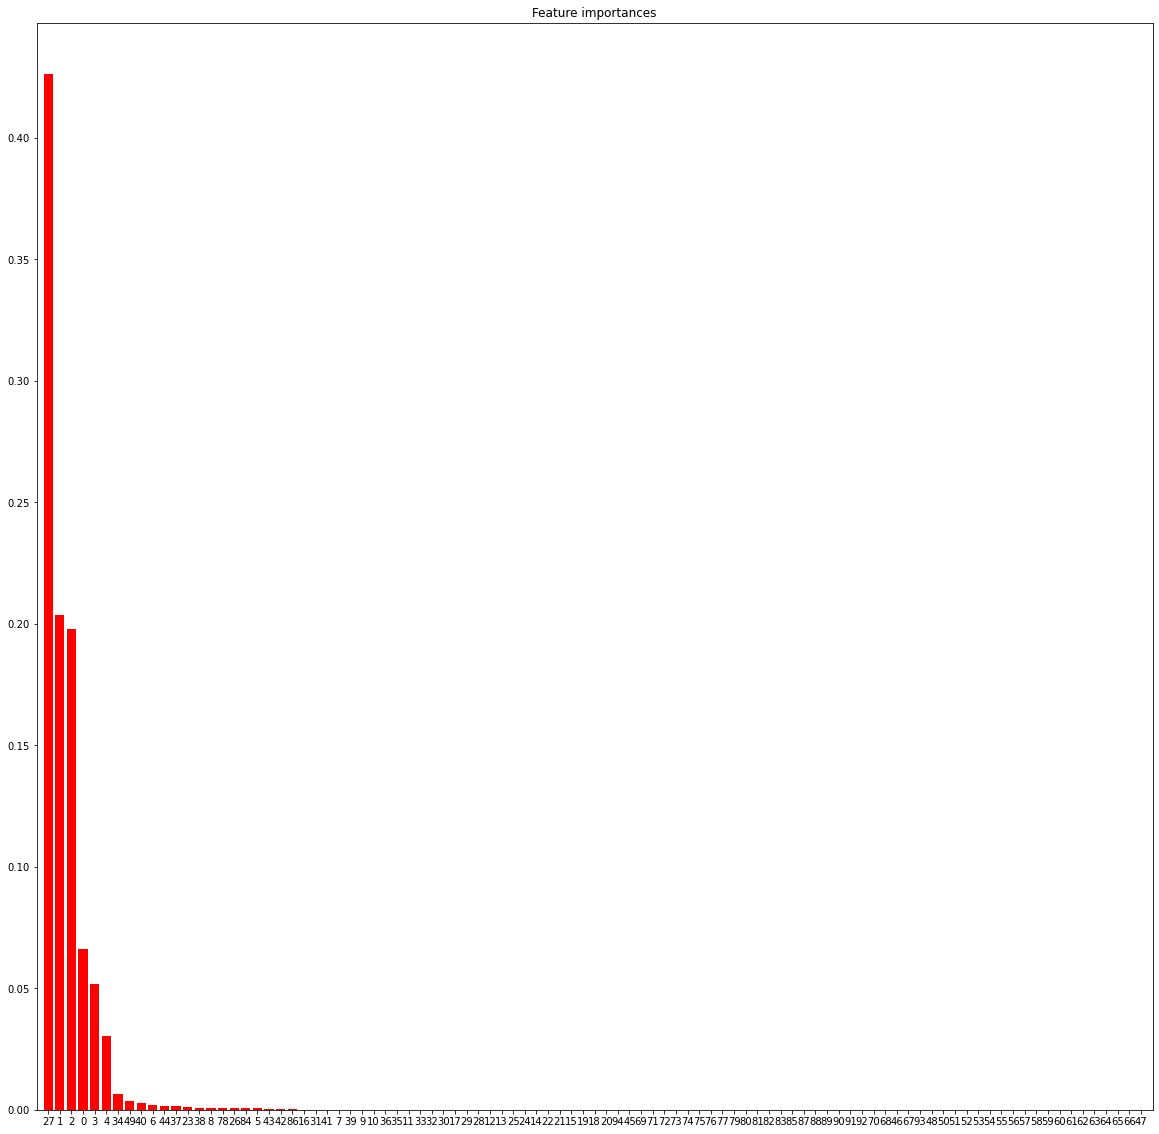

In [ ]:
feature_names = list(X_train.columns)

importances = clf.feature_importances_ ## most important line in this cell

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(f'{f+1} feature {feature_names[indices[f]]} {importances[indices[f]]}')


plt.figure(figsize=(20, 20))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# What the most important hyper parameters in DT ?

- ``criterion`` : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.


- ``splitter`` : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.


- ``max_depth`` : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting 


- ``min_samples_split`` : int or float, default=2 . The minimum number of samples required to split an internal node


- ``class_weight``: dict, list of dict or “balanced”, default=None

## Hyperparameter tuning

In [ ]:
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)

print("Start fitting the data")

hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,9)}
for cv in tqdm(range(3,6)):
    grid = GridSearchCV(clf, param_grid  = hp  , cv = cv)
    grid.fit(X_train,y_train)
    print(f"score for {cv} fold CV is : {grid.score(X_test,y_test)}")
    print(f"Best result {grid.best_params_}")

Start fitting the data


NameError: name 'tqdm' is not defined

# Avoiding Overfitting :

1. Acquire more training data


2. Remove irrelevant attributes


3. **Grow full tree, then post-prune** 


4. Ensemble learning. 


## Pruning

We can perform the pruning either before building the fully grown tree - pre-pruning - or after building it - post-pruning-

- We have already performed pre-pruning by specifiying the maximum depth in our implementation, or by controlling the different hyperparameters in sklearn implementation such as the min_samples_split and max_leaf_nodes


- However, this approach is not preferred or shouldn't be used alone, because a seemingly worthless split early on in the tree might be followed by a very good split.


- Therefore, it should be combined with post-pruning, also known as cost-complexity pruning and as weakest link pruning.

We can perform post-purning to prune the fully grown tree in a *bottom-up manner*.

- The idea is basically about, starting at the leaves, each node is replaced with its most popular class.


- If the prediction accuracy is not affected then the change is kept. 



We can also explain it as follows :

- Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter α.


- For each value of α there corresponds a subtree $$T ⊂ T_0$$ such that Cost $$T = Error(T) + α |T|$$ is small as possible


- $$|T|$$ indicates the number of terminal nodes of the tree T


- The tuning parameter α controls a trade-off between the subtree’s complexity and its fit to the training data. When α = 0, then the subtree T will simply equal $$T_0$$


- as we increase α from zero, branches get pruned from the tree

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

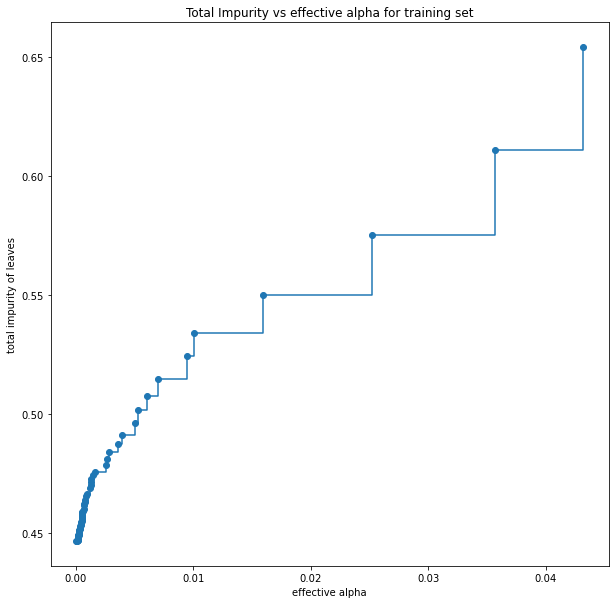

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 10)

X_train = pd.get_dummies(X_train,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)
clf = tree.DecisionTreeClassifier( criterion='entropy', max_depth = max_depth)
path = clf.cost_complexity_pruning_path(X_train, y_train) ## Pruning !

ccp_alphas, impurities = path.ccp_alphas, path.impurities ## Alpha we have been talking about
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective ``alphas``. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15397075459323895


Now, we remove the last element in ``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one node.


Here we show that the number of nodes and tree depth decreases as alpha increases.

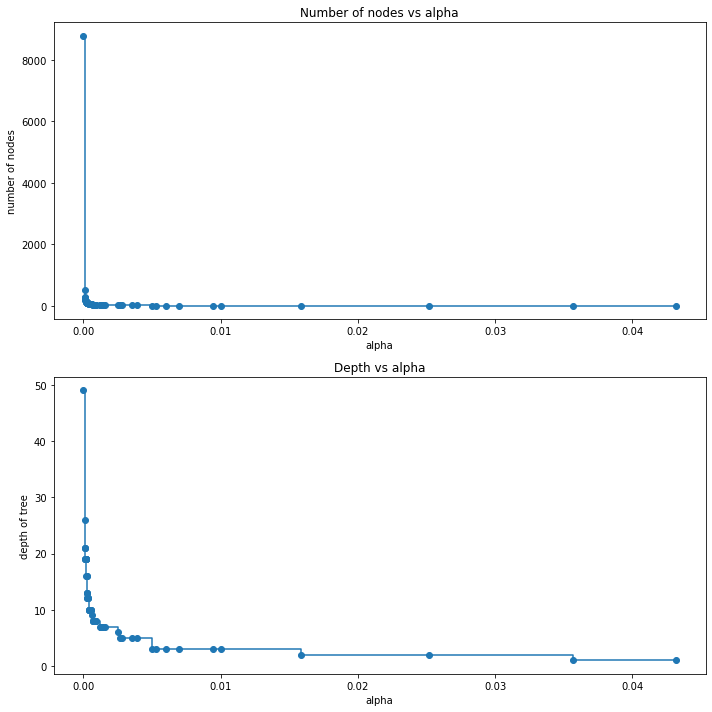

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

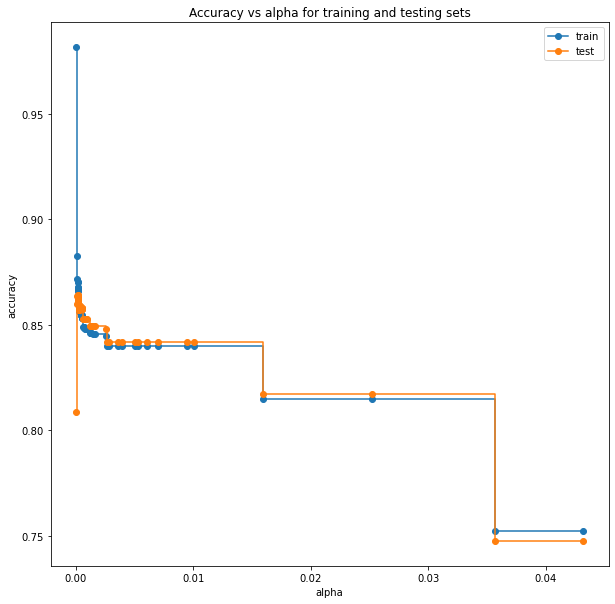

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* As we can see, When ``ccp_alpha`` is set to ``zero`` and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a ``97.5%`` training accuracy and ``80%`` testing accuracy.


* As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.Setting ``ccp_alpha=8.70266265e-05`` maximizes the testing accuracy

# Extra : Gain Ratio
Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as customer_ID has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning.

C4.5, an improvement of ID3, uses an extension to information gain known as the gain ratio. Gain ratio handles the issue of bias by normalizing the information gain using Split Info

# Decision Tree Pros and Cons


| Pros | Cons
| --- | --- 
|Easy to interpret and visualize.| Sensitive to noisy data. It can overfit noisy data.
|Has no assumptions about distribution because of the non-parametric nature of the algorithm.|The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
|Can easily capture Non-linear patterns.|Biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.
|It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.|Greedy algorithms don’t yield the global optimum tree structure.
|It can be used for feature engineering such as predicting missing values, suitable for variable selection.| As the branching goes deeper, you get exponentially less data.
|It has no problem whether the inputs and outputs are binary, categorical or continuous

# Tasks [ 10 points ]

## Task 1 : Work with the COMPLETE [dataset](https://archive.ics.uci.edu/ml/datasets/adult)

- **[ 2 points ] :** Load the dataset and perform the proper data preprocessing/ cleaning. Justify all your steps. Elaborate and descripe as much as possible. Don't worry, I will read everything.


- **[ 2 point  ] :** Run our implementation on the complete dataset. Compare the accuracy you get with the one we got before. Explain why the results are either better or worse.


- **[ 1 point  ] :** Perform hyper-parameter tuning using gridsearch. 


- **[ 1 point  ] :** Visualize the tree by using the sklearn functions. Discuss the first two features and attributes that the tree were split on. Do you they make sense for you? Why?


- **[ 2 point  ] :** Plot the feature importance, and choose the most important 5 of them and run our algorithm only on them. Compare the accuracy you get with the accuracy you got on the full dataset. 


In [ ]:
df = pd.read_csv('adult.data')

df_clean = df.copy()
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### A very obvious problem here is that the columns' labels are all incorrect, they are values not labels.

In [ ]:
col = {'39': 'age', ' State-gov': 'workclass', ' 77516': 'fnlwgt'
                             , ' Bachelors': 'education', ' 13': 'education-num', ' Never-married': 'marital-status',
                             ' Adm-clerical': 'occupation', ' Not-in-family': 'relationship', ' White': 'race', ' Male': 'sex',
                             ' 2174': 'capital-gain', ' 0': 'capital-loss', ' 40': 'hours-per-week',
                             ' United-States': 'native-country', ' <=50K': 'eligible'}
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [ ]:
df_clean = df.rename(columns=col) 
df_clean.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,eligible
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  eligible        32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### There are no null values, the data is complete. 
### The dataypes are right 

In [ ]:
df_clean.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### The data is not normalized nor standardized 

In [ ]:
df_clean.sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,eligible
32514,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
27432,29,Private,187188,Masters,14,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,0,0,60,United-States,<=50K
16800,56,Private,111218,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K
26931,25,Private,113035,Some-college,10,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
29303,24,Private,44738,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,White,Male,0,0,40,United-States,<=50K
18080,31,Private,192900,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
28181,23,Self-emp-inc,39844,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,50,United-States,<=50K
10451,31,Local-gov,213307,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
22384,47,Private,246739,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
16016,41,Private,207578,Assoc-acdm,12,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,50,India,>50K


### Now the `eligible` column's values should be changed to `yes` , `no` ,
### or `1` for eligible (>50K) and `0` for not eligible (<=50K)

In [ ]:
#df_clean[df_clean['eligible'] == " >50K"].eligible
df_clean['eligible'] = df_clean.eligible.apply(lambda x: 1 if x == " >50K" else 0)
#df_clean[df_clean['eligible'] == " <=50K"].eligible = 0

df_clean['eligible'].value_counts()


0    24719
1     7841
Name: eligible, dtype: int64

In [ ]:
df_clean['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df_clean['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
v_c = {}
for col in df_clean.columns:
    v_c [col] = [df_clean[col].value_counts()]
v_c

{'age': [36    898
  31    888
  34    886
  23    877
  35    876
       ... 
  83      6
  85      3
  88      3
  87      1
  86      1
  Name: age, Length: 73, dtype: int64],
 'workclass': [ Private             22696
   Self-emp-not-inc     2541
   Local-gov            2093
   ?                    1836
   State-gov            1297
   Self-emp-inc         1116
   Federal-gov           960
   Without-pay            14
   Never-worked            7
  Name: workclass, dtype: int64],
 'fnlwgt': [123011    13
  203488    13
  164190    13
  121124    12
  148995    12
            ..
  68318      1
  284211     1
  312881     1
  177711     1
  229376     1
  Name: fnlwgt, Length: 21647, dtype: int64],
 'education': [ HS-grad         10501
   Some-college     7291
   Bachelors        5354
   Masters          1723
   Assoc-voc        1382
   11th             1175
   Assoc-acdm       1067
   10th              933
   7th-8th           646
   Prof-school       576
   9th               514
   1

### The ? in `workclass`,  `occupation`, ` native-country`, should be changed to Nan values 

In [ ]:
df_clean.replace({' ?': np.NaN}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      30717 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  31977 non-null  object
 14  eligible        32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


### Apparently, There were missing values in these columns!

<AxesSubplot:xlabel='eligible', ylabel='count'>

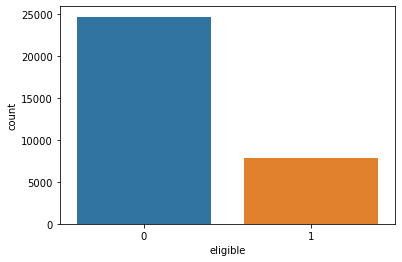

In [ ]:
sns.countplot(x='eligible',data=df_clean)

##The data is not balanced

In [ ]:
df_clean.sample(10)

## fnlwgt column name is mysterious and vague! It can be removed
df_clean.drop('fnlwgt', axis=1, inplace=True)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       30724 non-null  object
 2   education       32560 non-null  object
 3   education-num   32560 non-null  int64 
 4   marital-status  32560 non-null  object
 5   occupation      30717 non-null  object
 6   relationship    32560 non-null  object
 7   race            32560 non-null  object
 8   sex             32560 non-null  object
 9   capital-gain    32560 non-null  int64 
 10  capital-loss    32560 non-null  int64 
 11  hours-per-week  32560 non-null  int64 
 12  native-country  31977 non-null  object
 13  eligible        32560 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [ ]:
categorical = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']
numerical = ['age', 'education-num','capital-gain', 'capital-loss',
                'hours-per-week']
 
X = pd.concat([df_clean[categorical], df_clean[numerical]], axis=1) ## Just sort them, no need for encoding
y = df_clean['eligible']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 5)

In [ ]:
#### Convert the dataframes to numpy arrays as our implementation works on NumPy arrays
X_train , X_test , y_train , y_test = X_train.to_numpy() , X_test.to_numpy() , y_train.to_numpy() , y_test.to_numpy()
max_depth = 7
inital_depth = 0
id3_dt = MyDecisionTree(max_depth)
# Building a tree
print("fitting the decision tree")
id3_dt.fit(X_train, y_train, inital_depth)

# Evaluating the decision tree
DecisionTreeEvalution(id3_dt,X_test,y_test, True)

In [ ]:
id3_dt.tree

## Task 2 : Work with another classification dataset from your choice
- **[ 2 points ] :** Do the same steps we did in Task 1 but with a classification dataset you choose. No minimum accuracy required.




## Bonus Task : Work with another *regression* dataset from your choice 
- **[ 3 points ] :** Use sklearn DecisionTree regressor on a regression dataset from your choice. It needs to be a one that we did not use in the course so far. You need to perform all the necessary preprocessing/visualization and justify it.